In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

DATA_DIR = os.path.join("..", "data/cs-train")

In [10]:
df = pd.DataFrame()

data_filenames = [f for f in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, f))]
data_filenames = sorted(data_filenames)

dataframes = []
for filename in data_filenames:
    invoice_filename = os.path.join(DATA_DIR, filename)
    invoice_df = pd.read_json(invoice_filename)
    
    # Rename column names where applicable
    invoice_df = invoice_df.rename(columns={
        'total_price': 'price',
        'StreamID': 'stream_id',
        'TimesViewed': 'times_viewed'
    })

    dataframes.append(invoice_df)    
    # df = df.append(invoice_df)
# Concatenate all DataFrames in the list
df = pd.concat(dataframes, ignore_index=True)

# Convert year, month, day to a datetime column
df["date"] = pd.to_datetime(df.year*10000+df.month*100+df.day, format='%Y%m%d')
df = df.drop(columns=['year', 'month', 'day'])

# Set country to a categorical type
df['country'] = df['country'].astype('category')
df['invoice'] = df['invoice'].astype('category')
df['customer_id'] = df['customer_id'].astype('category')
df['stream_id'] = df['stream_id'].astype('category')

# Reorder columns
df = df[['date', 'price', 'times_viewed', 'stream_id', 'country', 'customer_id', 'invoice']]

# Remove outliers
df = df[df['price'].between(df['price'].quantile(0.02), df['price'].quantile(0.98))]
    
df

,date,price,times_viewed,stream_id,country,customer_id,invoice
0,2017-11-28,6.95,12,85048,United Kingdom,13085.0,489434
1,2017-11-28,8.65,1,22130,United Kingdom,NaN,489597
2,2017-11-28,1.70,6,22132,United Kingdom,NaN,489597
3,2017-11-28,1.70,4,22133,United Kingdom,NaN,489597
4,2017-11-28,0.87,1,22134,United Kingdom,NaN,489597
...,...,...,...,...,...,...,...
815006,2019-07-31,0.85,12,21544,United Kingdom,15628.0,562163
815007,2019-07-31,1.95,8,47591D,United Kingdom,15628.0,562163
815008,2019-07-31,0.83,12,23167,United Kingdom,15628.0,562163
815009,2019-07-31,4.95,3,22138,United Kingdom,15628.0,562163


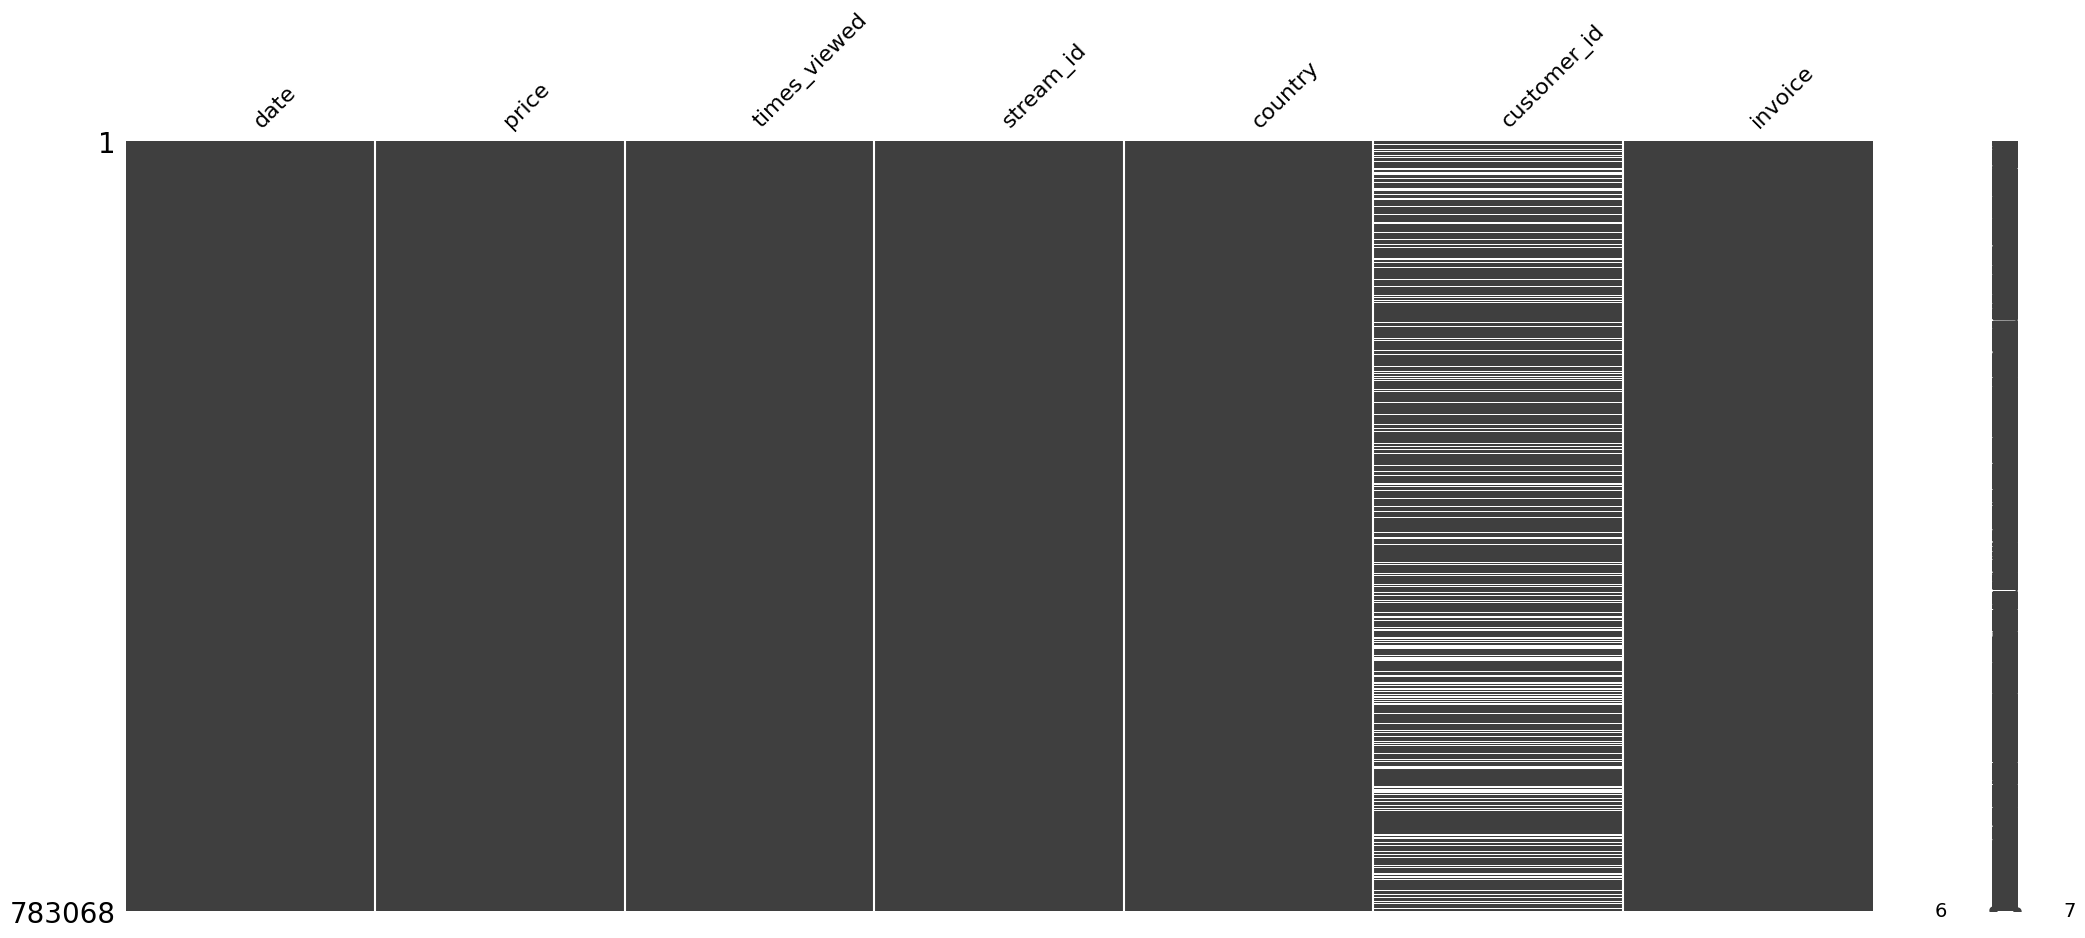

In [11]:
msno.matrix(df)
plt.show()

In [12]:
df['invoice'].value_counts()

invoice
537434     1298
538071     1250
537638     1170
537823     1148
536876     1146
           ... 
554907        0
C507057       0
C507055       0
C507044       0
527771        0
Name: count, Length: 42646, dtype: int64

C:\Users\vieta\AppData\Local\Temp\ipykernel_9584\2214939641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=10)


<Axes: xlabel='price', ylabel='Density'>

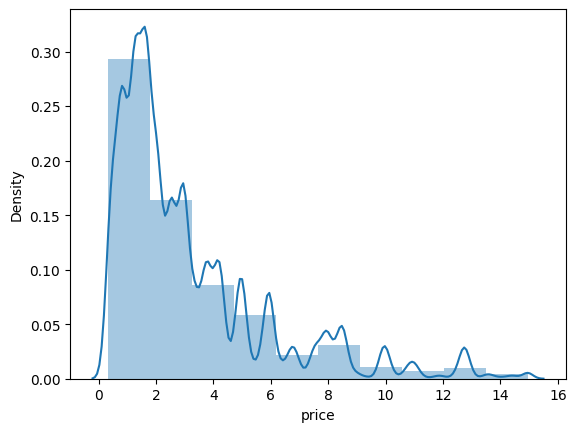

In [20]:
sns.distplot(df['price'], bins=10)

C:\Users\vieta\AppData\Local\Temp\ipykernel_9584\3928232310.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['date'], bins=10)


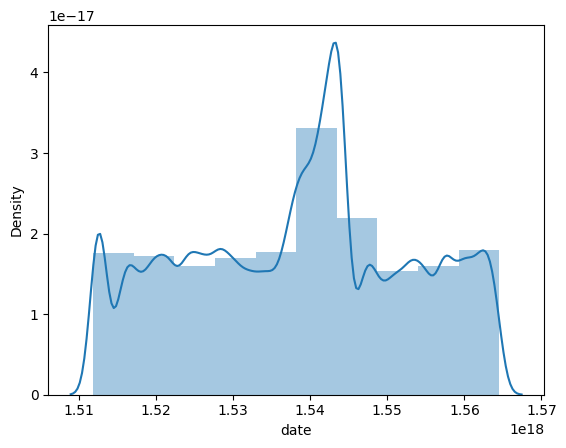

In [19]:
sns.distplot(df['date'], bins=10)
plt.show()

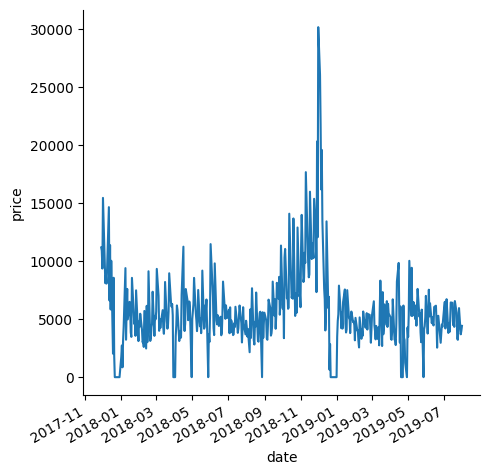

In [23]:
# g = sns.relplot(x='date', y='price', data=df.groupby(pd.Grouper(key='date', freq='B')).sum().reset_index(), kind='line')
# g.fig.autofmt_xdate()
data = df.groupby(pd.Grouper(key='date', freq='B')).sum(numeric_only=True).reset_index()
g = sns.relplot(x='date', y='price', data=data, kind='line')
g.fig.autofmt_xdate()


In [24]:
revenue_by_country = df[['country', 'price']].groupby('country').sum().sort_values('price', ascending=False)
revenue_by_country = revenue_by_country.rename(columns={'price': 'revenue'})
revenue_by_country = revenue_by_country.reset_index()
revenue_by_country.head()

,country,revenue
0,United Kingdom,2293942.34
1,EIRE,44002.62
2,Germany,34250.95
3,France,24010.81
4,Netherlands,8430.19


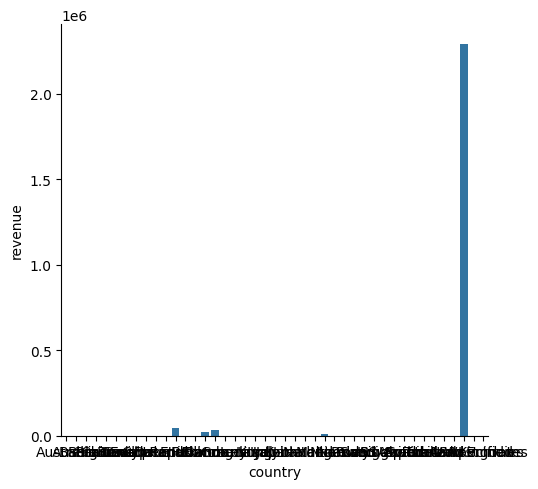

In [25]:
sns.catplot(x='country', y='revenue', data=revenue_by_country[:5], kind='bar')
plt.show()

In [26]:
revenue_by_country.index

RangeIndex(start=0, stop=43, step=1)

In [27]:
df['country'].value_counts()

country
United Kingdom          722472
EIRE                     13004
Germany                  12593
France                    9228
Netherlands               3896
Spain                     2483
Switzerland               2221
Belgium                   2008
Portugal                  1743
Australia                 1525
Channel Islands           1221
Sweden                    1089
Italy                     1004
Cyprus                     881
Norway                     724
Finland                    702
Austria                    675
Greece                     612
Unspecified                599
Denmark                    553
Japan                      500
United Arab Emirates       435
Poland                     424
Singapore                  291
Hong Kong                  265
USA                        263
Canada                     212
Malta                      210
Iceland                    193
Lithuania                  188
Israel                     137
Bahrain                    126
